In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

sns.set_style('darkgrid')

font = {'size': 18}
matplotlib.rc('font', **font)

In [2]:
df = pd.read_pickle("data/train_full.pkl")

In [3]:
pd.__version__

'1.3.4'

In [4]:
df.head()

,title,selftext,num_user_comments,median_user_comment_score,max_user_comment_score,median_user_submission_score,max_user_submission_score,title_length,selftext_length,account_age_in_days,minutes_into_day,weekday,ismorning,isweekend,score,num_comments,virality_score,is_viral
0,Refinance my home to free up VA loan or wait?,First let me say thank you for looking at my p...,94,1.0,1871.0,3.0,25906.0,45,1119,1711,680,0,False,False,1,2,0.199978,False
1,Thank you for being such a great resource; you...,[removed],0,0.0,0.0,6.0,4888.0,82,9,4030,68,0,False,False,1,2,0.199978,False
2,"401k vs 457b, not sure which to max first",My work has both the 401k and 457b plans. They...,0,0.0,0.0,0.0,0.0,41,576,4209,770,5,False,True,3,7,0.674514,False
3,"Student Loans, Interest Rate, and Payment Stra...",I'll be attending graduate school soon. Tuitio...,0,0.0,0.0,2.0,490.0,59,381,1300,764,1,False,False,2,2,0.250797,False
4,What do I put under Gross Income when applying...,I'm applying for a Discover Secured Credit Car...,29,1.0,3.0,1.5,42.0,64,335,309,1287,3,False,False,0,15,1.118697,False


Adding sentiment analysis using nltk library to df

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

sia = SIA()
results_neg = []
results_neu = []
results_pos = []
results_comp = []

for line in df.title:
    pol_score = sia.polarity_scores(line)
    pol_score['title'] = line

    results_neg.append(pol_score['neg'])
    results_neu.append(pol_score['neu'])
    results_pos.append(pol_score['pos'])
    results_comp.append(pol_score['compound'])

In [6]:
df['senti_compnd'] = results_comp
df['senti_neg'] = results_neg
df['senti_pos'] = results_pos
df['senti_neu'] = results_neu

In [7]:
y = df.is_viral.copy()

In [8]:
print("y takes on the values 0 and 1", np.unique(y))
print("with a", np.unique(y, return_counts=True)[1]/len(y), "split.")

y takes on the values 0 and 1 [False  True]
with a [0.91232662 0.08767338] split.


In [9]:
df.keys()

Index(['title', 'selftext', 'num_user_comments', 'median_user_comment_score',
       'max_user_comment_score', 'median_user_submission_score',
       'max_user_submission_score', 'title_length', 'selftext_length',
       'account_age_in_days', 'minutes_into_day', 'weekday', 'ismorning',
       'isweekend', 'score', 'num_comments', 'virality_score', 'is_viral',
       'senti_compnd', 'senti_neg', 'senti_pos', 'senti_neu'],
      dtype='object')

In [10]:
features = ['num_user_comments', 'median_user_comment_score',
       'max_user_comment_score', 'median_user_submission_score',
       'max_user_submission_score', 'title_length', 'selftext_length',
       'account_age_in_days', 'minutes_into_day', 'weekday','senti_compnd','senti_neg','senti_neu','senti_pos']

In [11]:
X = df[features].copy()

In [12]:
X

,num_user_comments,median_user_comment_score,max_user_comment_score,median_user_submission_score,max_user_submission_score,title_length,selftext_length,account_age_in_days,minutes_into_day,weekday,senti_compnd,senti_neg,senti_neu,senti_pos
0,94,1.0,1871.0,3.0,25906.0,45,1119,1711,680,0,0.5106,0.000,0.732,0.268
1,0,0.0,0.0,6.0,4888.0,82,9,4030,68,0,0.8934,0.111,0.356,0.534
2,0,0.0,0.0,0.0,0.0,41,576,4209,770,5,-0.2411,0.197,0.803,0.000
3,0,0.0,0.0,2.0,490.0,59,381,1300,764,1,0.4588,0.000,0.700,0.300
4,29,1.0,3.0,1.5,42.0,64,335,309,1287,3,-0.1280,0.211,0.612,0.177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124936,0,0.0,0.0,19.0,2234.0,21,609,2308,1032,2,0.0000,0.000,1.000,0.000
124937,0,0.0,0.0,3.0,3.0,51,9,848,1073,4,0.4019,0.000,0.787,0.213
124938,62,2.0,182.0,3.0,1689.0,79,1209,3050,1140,4,0.3818,0.155,0.595,0.250
124939,11,1.0,5.0,3.0,120.0,72,9,1257,553,4,0.0000,0.000,1.000,0.000


 Logistic regression models

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X.copy(),y,
                                                       shuffle=True,
                                                       random_state=214,
                                                       stratify=y,
                                                       test_size=.2)

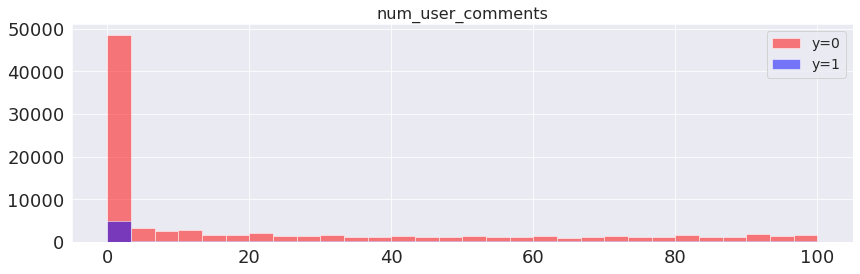

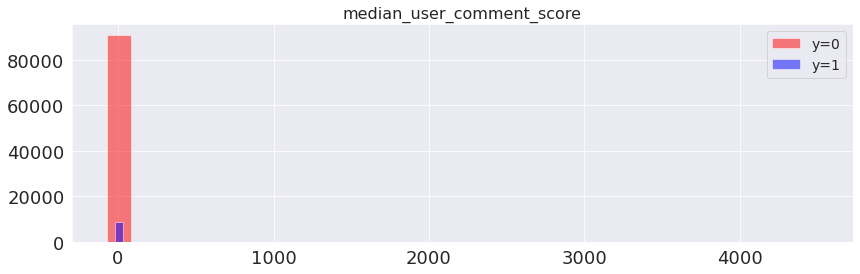

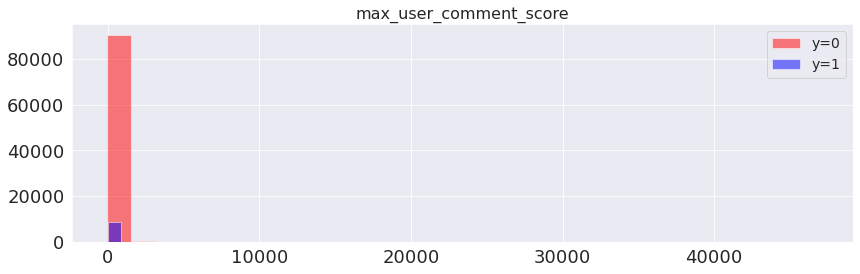

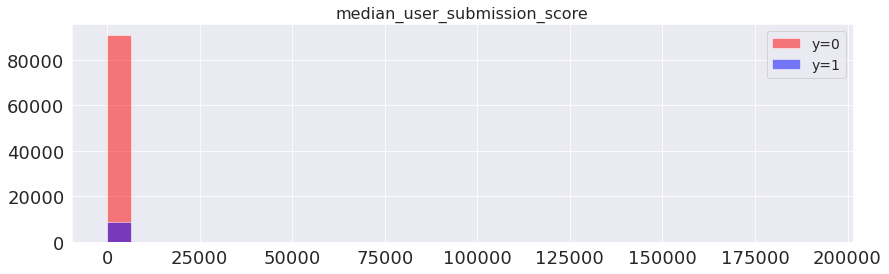

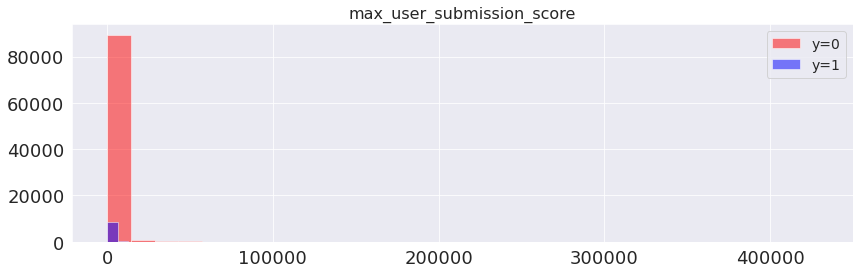

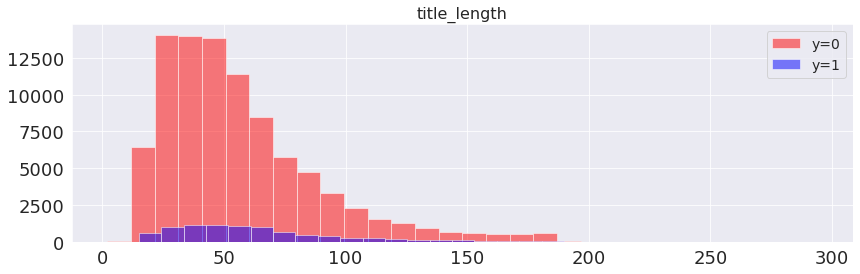

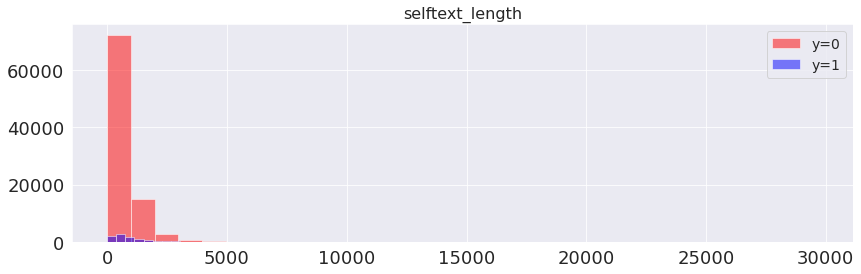

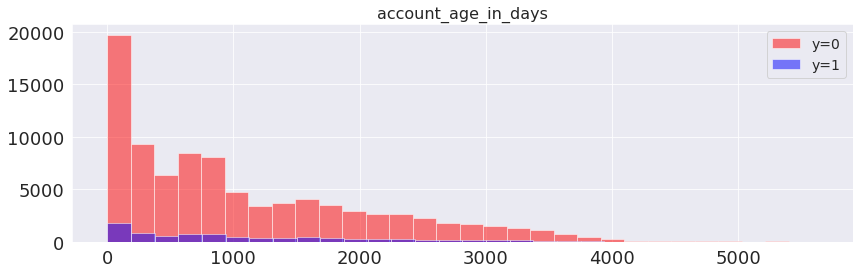

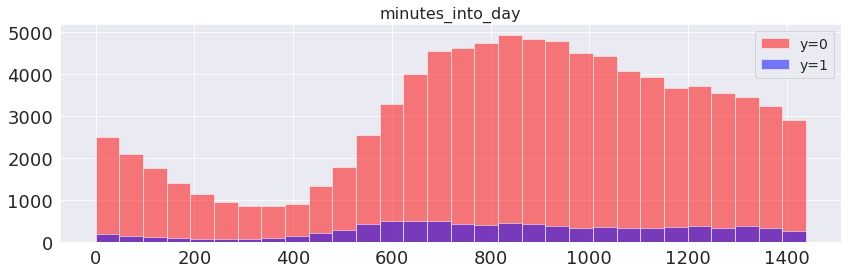

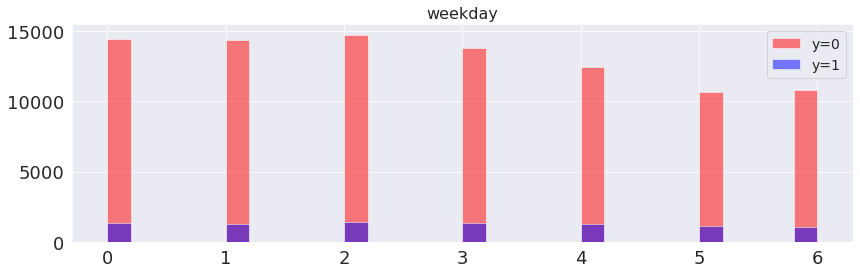

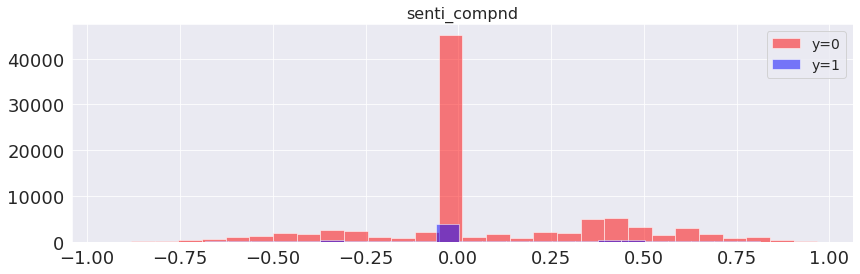

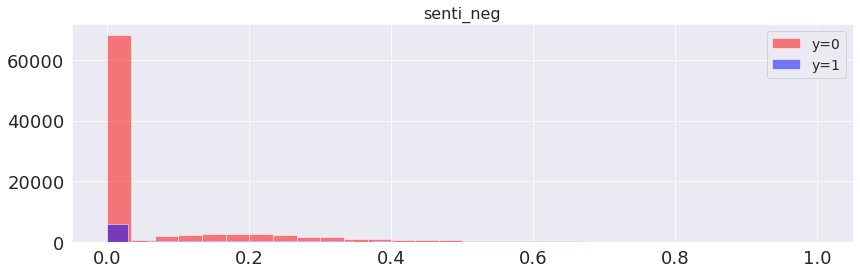

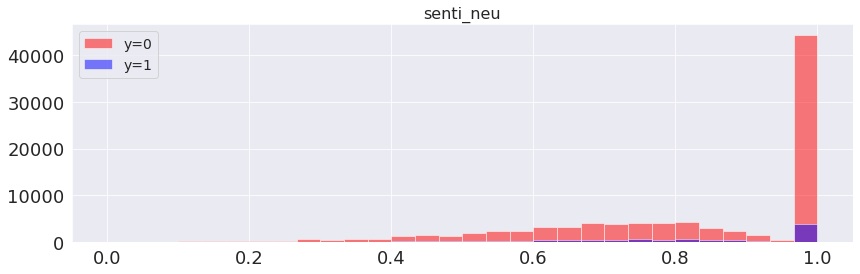

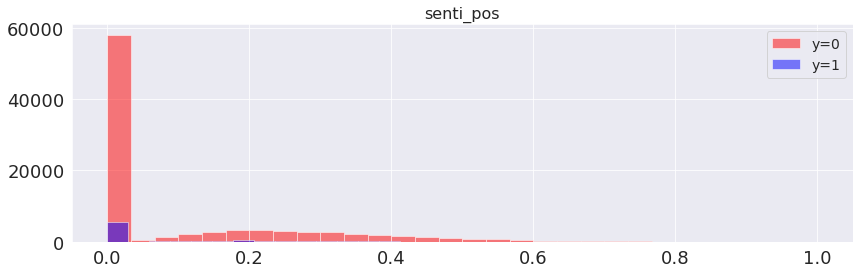

In [15]:
## histograms
for column in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.hist(X_train.loc[y_train==0, column], color='r', alpha=.5, label="y=0", bins=30)
    plt.hist(X_train.loc[y_train==1, column], color='b', alpha=.5, label="y=1", bins=30)
    plt.legend(fontsize=14)
    plt.title(column,fontsize=16)
    plt.show()

In [16]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [17]:
kfold = StratifiedKFold(5, shuffle=True, random_state=14235)

log_reg_cv_aucs = np.zeros((5, len(X_train.columns)))

log_reg = LogisticRegression()

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_train_train = y_train.iloc[train_index]
    y_holdout = y_train.iloc[test_index]
    j = 0
    for c in X_train.columns:
        log_reg_clone = clone(log_reg)
        log_reg_clone.fit(X_train_train[c].values.reshape(-1,1), y_train_train)
        log_reg_cv_aucs[i,j] = roc_auc_score(y_holdout, log_reg_clone.predict(X_holdout[c].values.reshape(-1,1)))
        j = j + 1
    i = i + 1

In [18]:
print("The feature with the highest avg. cv ROC AUC was",
          X_train.columns[np.argmax(np.mean(log_reg_cv_aucs, axis=0))])
print("This feature produced a model with avg. cv. ROC AUC of",np.round(np.max(np.mean(log_reg_cv_aucs, axis=0)),4))

The feature with the highest avg. cv ROC AUC was selftext_length
This feature produced a model with avg. cv. ROC AUC of 0.5005


Dimensionality Reduction

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [20]:
scaler = StandardScaler()
pca = PCA(2)

X_train_scaled = scaler.fit_transform(X_train)
X_train_PCA = pca.fit_transform(X_train_scaled)

In [21]:
X_train_PCA[y_train==0,0]

array([-1.14172852,  0.21781763,  3.38576074, ..., -0.88247997,
        4.23515165, -1.03520919])

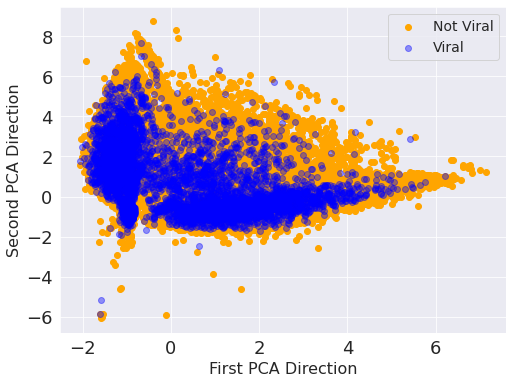

In [22]:
plt.figure(figsize=(8,6))

plt.scatter(X_train_PCA[y_train==0,0], 
            X_train_PCA[y_train==0,1], 
            c='orange', 
            label='Not Viral')
plt.scatter(X_train_PCA[y_train==1,0], 
            X_train_PCA[y_train==1,1], 
            c='blue', 
            label='Viral',
            alpha=.4)

plt.legend(fontsize=14)

plt.xlabel("First PCA Direction", fontsize=16)
plt.ylabel("Second PCA Direction", fontsize=16)

plt.show()

Analyzing PCA output 



In [23]:
comp_df = pd.DataFrame(pca.components_.transpose(),
                        columns = ['component_1', 'component_2'],
                        index = X_train.columns)

In [24]:
print("Sorted according to component 1")
print(comp_df.component_1.sort_values())
print()

print("Sorted according to component 2")
print(comp_df.component_2.sort_values())

Sorted according to component 1
senti_neu                      -0.493709
senti_neg                      -0.089103
selftext_length                -0.029971
account_age_in_days            -0.026417
num_user_comments              -0.013244
minutes_into_day               -0.012893
max_user_comment_score         -0.008887
median_user_submission_score   -0.006118
max_user_submission_score      -0.003012
median_user_comment_score       0.000969
title_length                    0.005603
weekday                         0.008892
senti_compnd                    0.550981
senti_pos                       0.665250
Name: component_1, dtype: float64

Sorted according to component 2
senti_neu                      -0.515589
senti_compnd                   -0.400155
title_length                   -0.090834
account_age_in_days            -0.068943
max_user_submission_score      -0.059643
num_user_comments              -0.050456
median_user_submission_score   -0.033802
max_user_comment_score         -0.016933

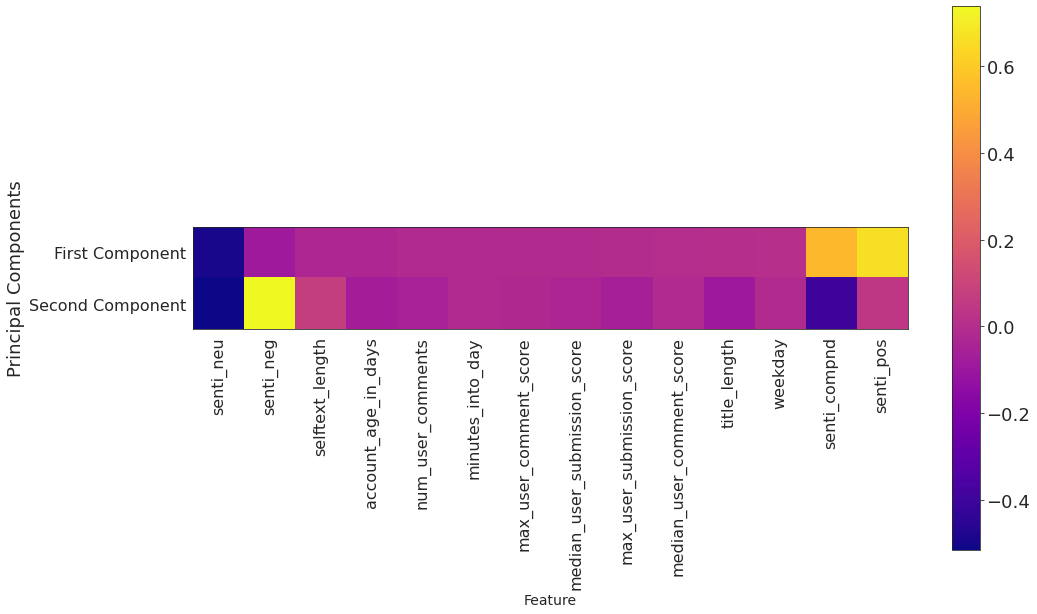

In [25]:
sns.set_style("white")

plt.figure(figsize=(16,10))

plt.imshow(comp_df.sort_values('component_1').values.transpose(), cmap = 'plasma')

plt.yticks([0,1], ["First Component", "Second Component"],
          fontsize = 16)

plt.colorbar()

plt.xticks(range(14),
          comp_df.sort_values('component_1').index, rotation = 90, 
          fontsize = 16)

plt.xlabel("Feature", fontsize = 14)
plt.ylabel("Principal Components", fontsize = 18)

plt.show()

In [26]:
pca = PCA(n_components=10)

pca.fit(X_train_scaled)

PCA(n_components=10)

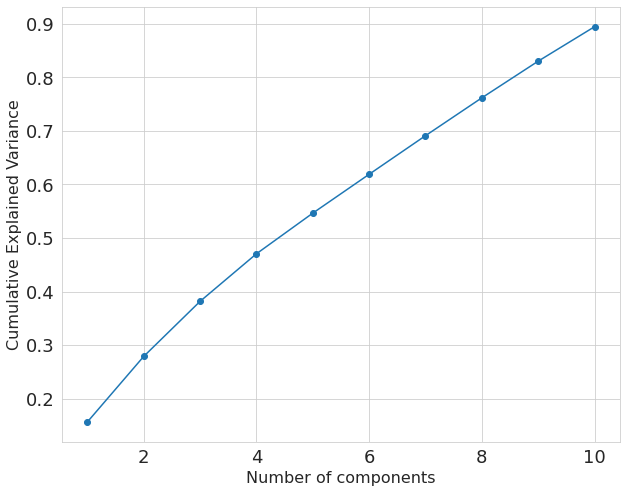

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))

plt.plot(range(1, 11), 
         np.cumsum(pca.explained_variance_ratio_),
        '-o')

plt.xlabel("Number of components", fontsize=16)
plt.ylabel("Cumulative Explained Variance", fontsize=16)

plt.show()

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [29]:
pipe = Pipeline([('scale', StandardScaler()),
                    ('pca', PCA(2)),
                    ('svc', SVC(kernel='linear',max_iter=100000, probability=True))])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()), ('pca', PCA(n_components=2)),
                ('svc',
                 SVC(kernel='linear', max_iter=100000, probability=True))])

In [30]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score

Training Accuracy 0.9123279174003521


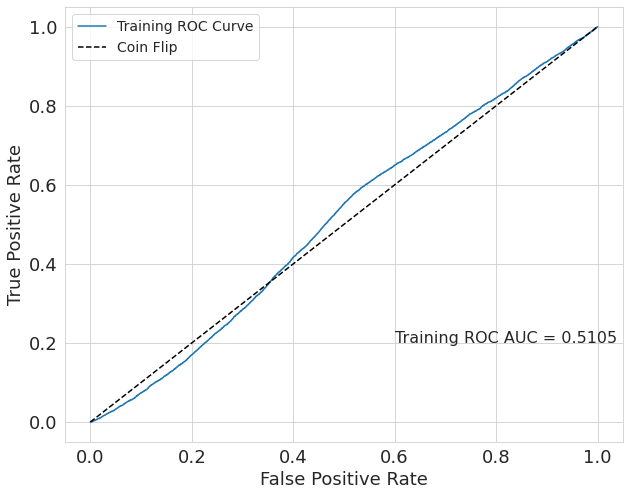

In [31]:
print("Training Accuracy", accuracy_score(y_train, pipe.predict(X_train)))

fprs,tprs,threshs = roc_curve(y_train, pipe.predict_proba(X_train)[:,1])

plt.figure(figsize=(10,8))

plt.plot(fprs, tprs, label='Training ROC Curve')
plt.plot([0,1], [0,1], 'k--', label="Coin Flip")
plt.text(.6,.2,
         "Training ROC AUC = "+ str(np.round(roc_auc_score(y_train, pipe.predict_proba(X_train)[:,1]),4)), 
                                                           fontsize=16)

plt.legend(fontsize=14)

plt.xlabel("False Positive Rate", fontsize=18)
plt.ylabel("True Positive Rate", fontsize=18)

plt.show()

Hyperparameter tuning

In [32]:
from sklearn.model_selection import StratifiedKFold

In [33]:
kfold = StratifiedKFold(5, shuffle=True, random_state=141535)
Cs = [10**i for i in range(-3,3)]

cv_accs = np.zeros((5, len(Cs)))
cv_aucs = np.zeros((5, len(Cs)))


i = 0
for train_index, test_index in  kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_train_train  =  y_train.iloc[train_index]
    y_holdout = y_train.iloc[test_index]
    
    j = 0
    for C in Cs:
        pipe = Pipeline([('scale', StandardScaler()),
                    ('pca', PCA(2)),
                    ('svc', SVC(C=C, kernel='linear', max_iter=100, probability=True))])
        pipe.fit(X_train_train, y_train_train)
        
        cv_accs[i,j] = accuracy_score(y_holdout, pipe.predict(X_holdout))
        cv_aucs[i,j] = roc_auc_score(y_holdout, pipe.predict_proba(X_holdout)[:,1])
        j = j + 1
    i = i + 1

/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:289:

In [34]:
print("The value of C with the largest mean cv accuracy was",
         Cs[np.argmax(np.mean(cv_accs, axis=0))],
         "with a mean cv accuracy of",
         np.round(np.max(np.mean(cv_accs, axis=0)), 4))

print("The value of C with the largest mean cv accuracy was",
         Cs[np.argmax(np.mean(cv_aucs, axis=0))],
         "with a mean cv accuracy of",
         np.round(np.max(np.mean(cv_aucs, axis=0)), 4))

The value of C with the largest mean cv accuracy was 100 with a mean cv accuracy of 0.6578
The value of C with the largest mean cv accuracy was 0.01 with a mean cv accuracy of 0.5167


Using sklearn's DecisionTreeClassifier to train a decision tree on the training data

In [35]:
## import DecisionTreeClassifier here
from sklearn.tree import DecisionTreeClassifier

In [36]:
## define and fit the model here
tree = DecisionTreeClassifier()

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
## code here
pred = tree.predict(X_train)

accuracy_score(y_train, pred)

1.0

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [40]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=4124)

train_accs = np.zeros(5)
holdout_accs = np.zeros(5)

tree = DecisionTreeClassifier()

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    y_train_train = y_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_holdout = y_train.iloc[test_index]
    
    tree_clone = clone(tree)
    tree_clone.fit(X_train_train, y_train_train)
    
    train_accs[i] = accuracy_score(y_train_train, tree_clone.predict(X_train_train))
    holdout_accs[i] = accuracy_score(y_holdout, tree_clone.predict(X_holdout))
    i = i + 1

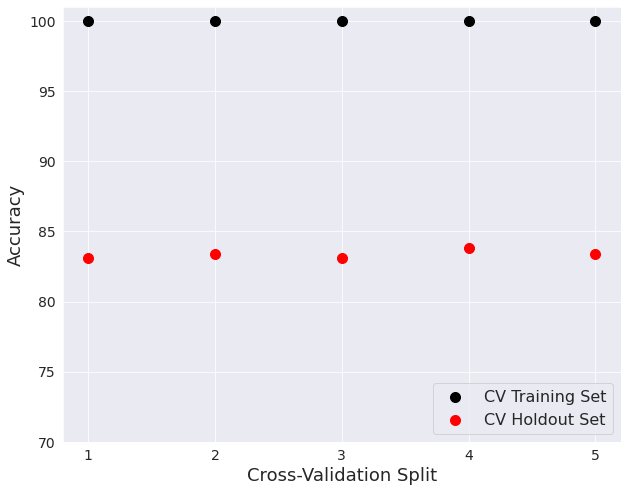

In [41]:
sns.set_style("darkgrid")

plt.figure(figsize=(10,8))

plt.scatter(range(1,6), 100*train_accs, s=100, c='k', label='CV Training Set')
plt.scatter(range(1,6), 100*holdout_accs, s=100, c='r', label='CV Holdout Set')

plt.xlabel("Cross-Validation Split", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.ylim(70,101)

plt.legend(loc=4,fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(range(1,6),fontsize=14)

plt.show()

In [44]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [45]:
depths = range(1,31)

cv_accs = np.zeros((5, len(depths)))
cv_aucs = np.zeros((5, len(depths)))

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    y_train_train = y_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_holdout = y_train.iloc[test_index]
    
    j = 0
    for depth in depths:
        tree = DecisionTreeClassifier(max_depth=depth, random_state=332)
        tree.fit(X_train_train, y_train_train)

        cv_accs[i,j] = accuracy_score(y_holdout, tree.predict(X_holdout))
        cv_aucs[i,j] = roc_auc_score(y_holdout, tree.predict_proba(X_holdout)[:,1])
        
        predict = tree.predict(X_holdout)
        print('max_depth=', depth)
        print("Precision:", precision_score(y_holdout, predict))
        print("Recall:", recall_score(y_holdout, predict))
        print("f1:", f1_score(y_holdout, predict))
        print('conf_mtrx = ', confusion_matrix(y_holdout, predict))
        
        j = j + 1
        
    i = i + 1

max_depth= 1
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1753     0]]
max_depth= 2
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 3
Precision: 1.0
Recall: 0.0005704506560182544
f1: 0.0011402508551881414
conf_mtrx =  [[18238     0]
 [ 1752     1]]
max_depth= 4
Precision: 1.0
Recall: 0.0005704506560182544
f1: 0.0011402508551881414
conf_mtrx =  [[18238     0]
 [ 1752     1]]
max_depth= 5
Precision: 0.16666666666666666
Recall: 0.0005704506560182544
f1: 0.0011370096645821487
conf_mtrx =  [[18233     5]
 [ 1752     1]]
max_depth= 6
Precision: 0.09090909090909091
Recall: 0.0005704506560182544
f1: 0.0011337868480725622
conf_mtrx =  [[18228    10]
 [ 1752     1]]
max_depth= 7
Precision: 0.08333333333333333
Recall: 0.0011409013120365088
f1: 0.00225098480585256
conf_mtrx =  [[18216    22]
 [ 1751     2]]
max_depth= 8
Precision: 0.10869565217391304
Recall: 0.002852253280091272
f1: 0.005558643690939411
conf_mtrx =  [[18197    41]
 [ 1748     5]]
max_depth= 9
Precision: 0.14666666666666667
Recall: 0.006274957216200799
f1: 0.012035010940919038
conf_mtrx =  [[18174    64]
 [ 1742    11]]
max_depth= 10
Precision: 0.16


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 2
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1753     0]]
max_depth= 3
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 4
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 5
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 6
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18236     2]
 [ 1753     0]]
max_depth= 7
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18229     9]
 [ 1753     0]]
max_depth= 8
Precision: 0.11363636363636363
Recall: 0.002852253280091272
f1: 0.005564830272676684
conf_mtrx =  [[18199    39]
 [ 1748     5]]
max_depth= 9
Precision: 0.08196721311475409
Recall: 0.002852253280091272
f1: 0.005512679162072768
conf_mtrx =  [[18182    56]
 [ 1748     5]]
max_depth= 10
Precision: 0.18461538461538463
Recall: 0.013690815744438107
f1: 0.025491237387148168
conf_mtrx =  [[18132   106]
 [ 1729    24]]
max_depth= 11
Precision: 0.13989637305699482
Recall: 0.01540216771249287
f1: 0.027749229188078112
conf_mtrx =  [[18072   166]
 [ 1726    27]]
max_depth= 12
Precision: 0.14652014652014653
Recall: 0.022818026240730177
f1: 0.039486673247778874
conf_mtrx =  [[18005   233]
 [ 1713    40]]
max_depth= 13
Precision: 0.12753623188405797
Recall: 0.025099828864803195
f1: 0.041944709246901815
conf_

/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]
max_depth= 3
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 4
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]
max_depth= 5
Precision: 0.3333333333333333
Recall: 0.0005707762557077625
f1: 0.0011396011396011395
conf_mtrx =  [[18236     2]
 [ 1751     1]]
max_depth= 6
Precision: 0.21428571428571427
Recall: 0.0017123287671232876
f1: 0.0033975084937712344
conf_mtrx =  [[18227    11]
 [ 1749     3]]
max_depth= 7
Precision: 0.25925925925925924
Recall: 0.003995433789954338
f1: 0.007869589657110737
conf_mtrx =  [[18218    20]
 [ 1745     7]]
max_depth= 8
Precision: 0.22033898305084745
Recall: 0.007420091324200913
f1: 0.01435670900055218
conf_mtrx =  [[18192    46]
 [ 1739    13]]
max_depth= 9
Precision: 0.2558139534883721
Recall: 0.012557077625570776
f1: 0.023939064200217623
conf_mtrx =  [[18174    64]
 [ 1730    22]]
max_depth= 10
Precision: 0.1925925925925926
Recall: 0.014840182648401826
f1: 0.02755696873343932
conf_mtrx =  [[18129   109]
 [ 1726    26]]
max_depth= 11
Precision: 0.1735159817351598
Recall: 0.02

/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]
max_depth= 3
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 4
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 5
Precision: 0.25
Recall: 0.001141552511415525
f1: 0.0022727272727272726
conf_mtrx =  [[18232     6]
 [ 1750     2]]
max_depth= 6
Precision: 0.2608695652173913
Recall: 0.003424657534246575
f1: 0.00676056338028169
conf_mtrx =  [[18221    17]
 [ 1746     6]]
max_depth= 7
Precision: 0.15384615384615385
Recall: 0.0045662100456621
f1: 0.008869179600886918
conf_mtrx =  [[18194    44]
 [ 1744     8]]
max_depth= 8
Precision: 0.175
Recall: 0.003995433789954338
f1: 0.007812499999999999
conf_mtrx =  [[18205    33]
 [ 1745     7]]
max_depth= 9
Precision: 0.20967741935483872
Recall: 0.007420091324200913
f1: 0.014332965821389194
conf_mtrx =  [[18189    49]
 [ 1739    13]]
max_depth= 10
Precision: 0.14583333333333334
Recall: 0.007990867579908675
f1: 0.015151515151515152
conf_mtrx =  [[18156    82]
 [ 1738    14]]
max_depth= 11
Precision: 0.21468926553672316
Recall: 0.021689497716894976
f1: 0.03939865215137377
conf_mtrx =  [[18099   139]
 [ 1714    38]]
max_depth= 12
Precision: 0.1732283464

/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]
max_depth= 3
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 4
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 5
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 6
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


max_depth= 7
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18233     4]
 [ 1753     0]]
max_depth= 8
Precision: 0.2391304347826087
Recall: 0.006274957216200799
f1: 0.012229016120066704
conf_mtrx =  [[18202    35]
 [ 1742    11]]
max_depth= 9
Precision: 0.21818181818181817
Recall: 0.013690815744438107
f1: 0.02576489533011272
conf_mtrx =  [[18151    86]
 [ 1729    24]]
max_depth= 10
Precision: 0.1702127659574468
Recall: 0.013690815744438107
f1: 0.025343189017951424
conf_mtrx =  [[18120   117]
 [ 1729    24]]
max_depth= 11
Precision: 0.16019417475728157
Recall: 0.018824871648602397
f1: 0.033690658499234305
conf_mtrx =  [[18064   173]
 [ 1720    33]]
max_depth= 12
Precision: 0.16538461538461538
Recall: 0.02452937820878494
f1: 0.04272230501738698
conf_mtrx =  [[18020   217]
 [ 1710    43]]
max_depth= 13
Precision: 0.1717171717171717
Recall: 0.0387906446092413
f1: 0.06328524895300139
conf_mtrx =  [[17909   328]
 [ 1685    68]]
max_depth= 14
Precision: 0.16775599128540306
Recall: 0.043924

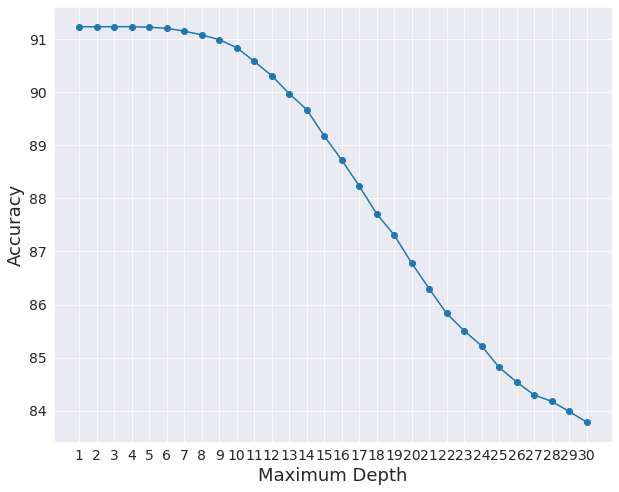

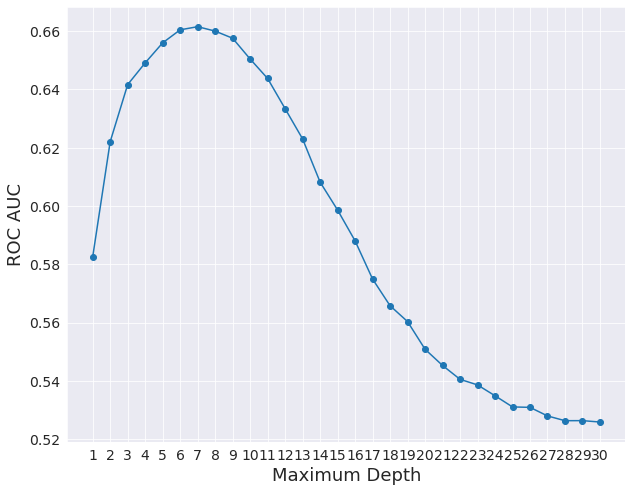

In [46]:
plt.figure(figsize=(10,8))


plt.plot(depths, 100*np.mean(cv_accs, axis=0), '-o')

plt.xlabel("Maximum Depth", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(depths,fontsize=14)

plt.show()

plt.figure(figsize=(10,8))


plt.plot(depths, np.mean(cv_aucs, axis=0), '-o')

plt.xlabel("Maximum Depth", fontsize=18)
plt.ylabel("ROC AUC", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(depths,fontsize=14)

plt.show()

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
num_of_trees = [10, 50, 100, 250, 500, 1000, 1500]

cv_accs = np.zeros((5,len(num_of_trees)))
cv_aucs = np.zeros((5,len(num_of_trees)))

i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    y_train_train = y_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_holdout = y_train.iloc[test_index]
    
    j = 0
    for num_trees in num_of_trees:
        acc_forest = RandomForestClassifier(max_depth=4,
                                            n_estimators=num_trees, 
                                            max_samples=200, 
                                            random_state=1341)
        auc_forest = RandomForestClassifier(max_depth=3,
                                            n_estimators=num_trees, 
                                            max_samples=200, 
                                            random_state=1341)
        
        acc_forest.fit(X_train_train, y_train_train)
        auc_forest.fit(X_train_train, y_train_train)

        cv_accs[i,j] = accuracy_score(y_holdout, acc_forest.predict(X_holdout))
        cv_aucs[i,j] = roc_auc_score(y_holdout, auc_forest.predict_proba(X_holdout)[:,1])
        j = j + 1
    i = i + 1

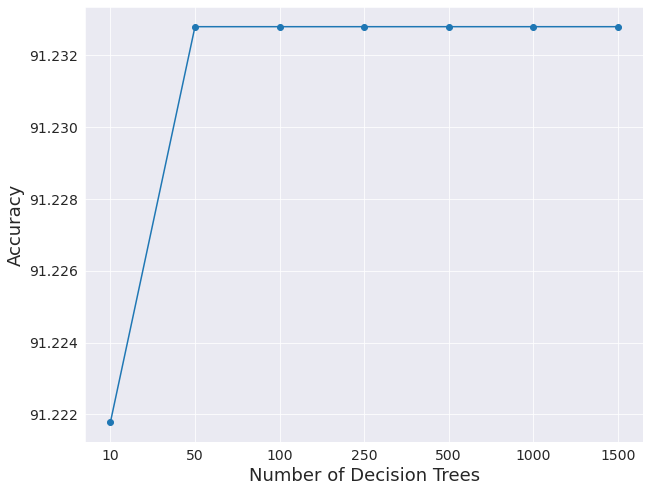

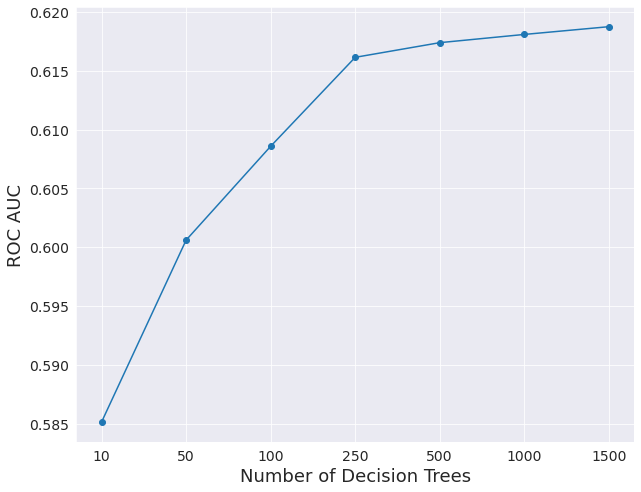

In [49]:
plt.figure(figsize=(10,8))


plt.plot(range(len(num_of_trees)), 100*np.mean(cv_accs, axis=0), '-o')

plt.xlabel("Number of Decision Trees", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(len(num_of_trees)), num_of_trees,fontsize=14)

plt.show()

plt.figure(figsize=(10,8))


plt.plot(range(len(num_of_trees)), np.mean(cv_aucs, axis=0), '-o')

plt.xlabel("Number of Decision Trees", fontsize=18)
plt.ylabel("ROC AUC", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(len(num_of_trees)), num_of_trees,fontsize=14)

plt.show()

Feature Importances

In [50]:
rf = RandomForestClassifier(max_depth=3,
                            n_estimators=500, 
                            max_samples=200)

rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_samples=200, n_estimators=500)

In [51]:
pd.DataFrame(rf.feature_importances_,
                index=X_train.columns,
                columns=['feature_importance_score']).sort_values('feature_importance_score')

,feature_importance_score
senti_pos,0.031791
weekday,0.032840
num_user_comments,0.043380
median_user_comment_score,0.046348
senti_neu,0.050337
senti_neg,0.053108
max_user_comment_score,0.065344
median_user_submission_score,0.071085
max_user_submission_score,0.077041
account_age_in_days,0.089368


Using your answer to the previous few questions use cross-validation to compare the accuracy and ROC AUC of:
- the single decision tree models from 5.
- the random forest models from 6.

In [52]:
from sklearn.ensemble import ExtraTreesClassifier

In [53]:
cv_accs = np.zeros((5,3))
cv_aucs = np.zeros((5,3))

acc_tree = DecisionTreeClassifier(max_depth=4)
auc_tree = DecisionTreeClassifier(max_depth=3)

acc_rf = RandomForestClassifier(max_depth=4, 
                                n_estimators=100,
                                max_samples=200, 
                                random_state=1341)
auc_rf = RandomForestClassifier(max_depth=3,
                                n_estimators=500,
                                max_samples=200,
                                random_state=1341)

acc_extra = ExtraTreesClassifier(max_depth=4, 
                                n_estimators=100,
                                max_samples=200, 
                                random_state=1341)
auc_extra = ExtraTreesClassifier(max_depth=3,
                                n_estimators=500,
                                max_samples=200,
                                random_state=1341)


i = 0
for train_index, test_index in kfold.split(X_train, y_train):
    X_train_train = X_train.iloc[train_index]
    y_train_train = y_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_holdout = y_train.iloc[test_index]
    
    acc_tree_clone = clone(acc_tree)
    auc_tree_clone = clone(auc_tree)
    acc_rf_clone = clone(acc_rf)
    auc_rf_clone = clone(auc_rf)
    acc_extra_clone = clone(acc_extra)
    auc_extra_clone = clone(auc_extra)
    
    acc_tree_clone.fit(X_train_train, y_train_train)
    auc_tree_clone.fit(X_train_train, y_train_train)
    acc_rf_clone.fit(X_train_train, y_train_train)
    auc_rf_clone.fit(X_train_train, y_train_train)
    acc_extra_clone.fit(X_train_train, y_train_train)
    auc_extra_clone.fit(X_train_train, y_train_train)
    
    cv_accs[i,0] = accuracy_score(y_holdout, acc_tree_clone.predict(X_holdout))
    cv_accs[i,1] = accuracy_score(y_holdout, acc_rf_clone.predict(X_holdout))
    cv_accs[i,2] = accuracy_score(y_holdout, acc_extra_clone.predict(X_holdout))
    
    cv_aucs[i,0] = roc_auc_score(y_holdout, auc_tree_clone.predict_proba(X_holdout)[:,1])
    cv_aucs[i,1] = roc_auc_score(y_holdout, auc_rf_clone.predict_proba(X_holdout)[:,1])
    cv_aucs[i,2] = roc_auc_score(y_holdout, auc_extra_clone.predict_proba(X_holdout)[:,1])
    
    i = i + 1

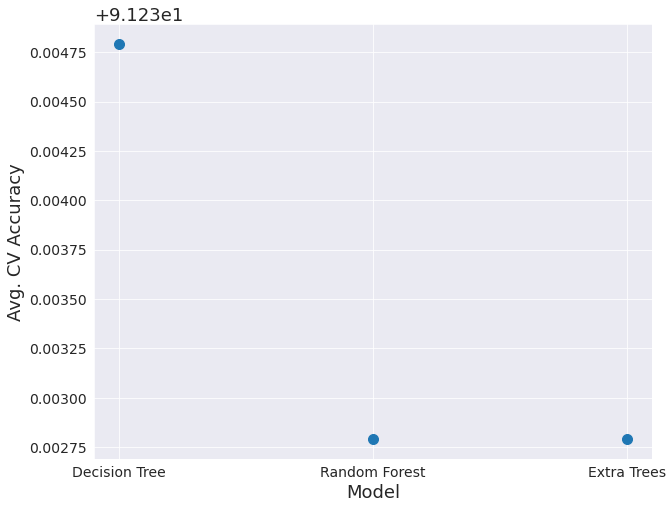

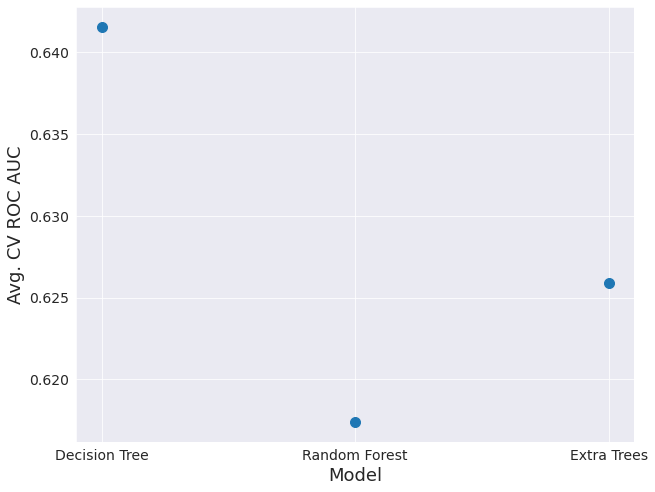

In [54]:
plt.figure(figsize=(10,8))

plt.scatter(range(3), 100*np.mean(cv_accs, axis=0), s=100)

plt.xlabel("Model", fontsize=18)
plt.ylabel("Avg. CV Accuracy", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(3), ['Decision Tree', 'Random Forest', 'Extra Trees'], fontsize=14)

plt.show()


plt.figure(figsize=(10,8))

plt.scatter(range(3), np.mean(cv_aucs, axis=0), s=100)

plt.xlabel("Model", fontsize=18)
plt.ylabel("Avg. CV ROC AUC", fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(range(3), ['Decision Tree', 'Random Forest', 'Extra Trees'], fontsize=14)

plt.show()

A boosting classifier

In [55]:
# import the appropriate items here
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [56]:
## We'll search from 1 to 50 weak learners
num_learners = range(1,51)

## Make an array to hold your cross validation results here
ada_aucs = np.zeros((5, len(num_learners)))

## fill in the code for a 5-fold cross-validation object here
kfold = StratifiedKFold(5, shuffle=True, random_state=413)


i=0
for train_index, test_index in kfold.split(X_train, y_train):
    # this will help you keep track of what kfold split you are on
    print(i)
    
    # this gets the training and holdout sets
    X_train_train = X_train.iloc[train_index]
    X_holdout = X_train.iloc[test_index]
    y_train_train = y_train.iloc[train_index]
    y_holdout = y_train.iloc[test_index]
    
    # here we loop through the different values for n_estimators
    for j in num_learners:
        # make the AdaBoostClassifier object here
        ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3), n_estimators=j, learning_rate=1)
        
        # fit that object here
        ada.fit(X_train_train, y_train_train)
        
        # record the performance in your array here
        ada_aucs[i,j-1] = roc_auc_score(y_holdout, ada.predict_proba(X_holdout)[:,1])
        predict = ada.predict(X_holdout)
            
        print('num_learnr=', j)
        print("Precision:", precision_score(y_holdout, predict))
        print("Recall:", recall_score(y_holdout, predict))
        print("f1:", f1_score(y_holdout, predict))
        print('conf_mtrx = ', confusion_matrix(y_holdout, predict))
    i = i + 1
    

0
num_learnr= 1
Precision: 1.0
Recall: 0.0005704506560182544
f1: 0.0011402508551881414
conf_mtrx =  [[18238     0]
 [ 1752     1]]
num_learnr= 2
Precision: 1.0
Recall: 0.0005704506560182544
f1: 0.0011402508551881414
conf_mtrx =  [[18238     0]
 [ 1752     1]]
num_learnr= 3
Precision: 1.0
Recall: 0.0005704506560182544
f1: 0.0011402508551881414
conf_mtrx =  [[18238     0]
 [ 1752     1]]
num_learnr= 4
Precision: 1.0
Recall: 0.0005704506560182544
f1: 0.0011402508551881414
conf_mtrx =  [[18238     0]
 [ 1752     1]]
num_learnr= 5
Precision: 1.0
Recall: 0.0011409013120365088
f1: 0.002279202279202279
conf_mtrx =  [[18238     0]
 [ 1751     2]]
num_learnr= 6
Precision: 1.0
Recall: 0.0011409013120365088
f1: 0.002279202279202279
conf_mtrx =  [[18238     0]
 [ 1751     2]]
num_learnr= 7
Precision: 0.6666666666666666
Recall: 0.0011409013120365088
f1: 0.002277904328018223
conf_mtrx =  [[18237     1]
 [ 1751     2]]
num_learnr= 8
Precision: 0.6666666666666666
Recall: 0.0011409013120365088
f1: 0.002

num_learnr= 12
Precision: 0.5625
Recall: 0.00513405590416429
f1: 0.010175240248728096
conf_mtrx =  [[18231     7]
 [ 1744     9]]
num_learnr= 13
Precision: 0.5333333333333333
Recall: 0.004563605248146035
f1: 0.009049773755656108
conf_mtrx =  [[18231     7]
 [ 1745     8]]
num_learnr= 14
Precision: 0.5
Recall: 0.004563605248146035
f1: 0.009044657998869417
conf_mtrx =  [[18230     8]
 [ 1745     8]]
num_learnr= 15
Precision: 0.5
Recall: 0.004563605248146035
f1: 0.009044657998869417
conf_mtrx =  [[18230     8]
 [ 1745     8]]
num_learnr= 16
Precision: 0.4375
Recall: 0.003993154592127781
f1: 0.00791407574901074
conf_mtrx =  [[18229     9]
 [ 1746     7]]
num_learnr= 17
Precision: 0.4375
Recall: 0.003993154592127781
f1: 0.00791407574901074
conf_mtrx =  [[18229     9]
 [ 1746     7]]
num_learnr= 18
Precision: 0.4666666666666667
Recall: 0.003993154592127781
f1: 0.007918552036199095
conf_mtrx =  [[18230     8]
 [ 1746     7]]
num_learnr= 19
Precision: 0.4375
Recall: 0.003993154592127781
f1: 0.

/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 2
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 3
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 4
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 5
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 6
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 7
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     1]
 [ 1752     0]]
num_learnr= 8
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     1]
 [ 1752     0]]
num_learnr= 9
Precision: 0.5
Recall: 0.0005707762557077625
f1: 0.0011402508551881412
conf_mtrx =  [[18237     1]
 [ 1751     1]]
num_learnr= 10
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     1]
 [ 1752     0]]
num_learnr= 11
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 12
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     1]
 [ 1752     0]]
num_learnr= 13
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18236     2]
 [ 1752     0]]
num_learnr= 14
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18234     4]
 [ 1752     0]]
num_learnr= 15
Precision: 0.2
Recall: 0.0005707762557077625
f1: 0.0011383039271485487
conf_mtrx =  [[18234     4]
 [ 1751     1]]
num_learnr= 16
Precision: 0.2
Recall: 0.0005707762557077625
f1: 0.0011383039271485487
conf_mtrx =  [[18234     4]
 [ 1751     1]]
num_learnr= 17
Precision: 0.16666666666666666
Recall: 0.0005707762557077625
f1: 0.0011376564277588168
conf_mtrx =  [[18233     5]
 [ 1751     1]]
num_learnr= 18
Precision: 0.16666666666666666
Recall: 0.0005707762557077625
f1: 0.0011376564277588168
conf_mtrx =  [[18233     5]
 [ 1751     1]]
num_learnr= 19
Precision: 0.25
Recall: 0.001141552511415525
f1: 0.0022727272727272726
conf_mtrx =  [[18232     6]
 [ 1750     2]]
num_learnr= 20
Precision: 0.2
Recall

/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]
num_learnr= 2
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 3
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 4
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 5
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 6
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 7
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 8
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18238     0]
 [ 1752     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 9
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     1]
 [ 1752     0]]
num_learnr= 10
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18236     2]
 [ 1752     0]]
num_learnr= 11
Precision: 0.14285714285714285
Recall: 0.0005707762557077625
f1: 0.001137009664582149
conf_mtrx =  [[18232     6]
 [ 1751     1]]
num_learnr= 12
Precision: 0.16666666666666666
Recall: 0.0005707762557077625
f1: 0.0011376564277588168
conf_mtrx =  [[18233     5]
 [ 1751     1]]
num_learnr= 13
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18234     4]
 [ 1752     0]]
num_learnr= 14
Precision: 0.14285714285714285
Recall: 0.0005707762557077625
f1: 0.001137009664582149
conf_mtrx =  [[18232     6]
 [ 1751     1]]
num_learnr= 15
Precision: 0.25
Recall: 0.001141552511415525
f1: 0.0022727272727272726
conf_mtrx =  [[18232     6]
 [ 1750     2]]
num_learnr= 16
Precision: 0.4
Recall: 0.00228310502283105
f1: 0.004540295119182747
conf_mtrx =  [[18232     6]
 [ 1748     4]]
num_learnr= 17
Precision: 

/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 2
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 3
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 4
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 5
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 6
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 7
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 8
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 9
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 10
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 11
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 12
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 13
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18237     0]
 [ 1753     0]]


/home/ashok/miniconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


num_learnr= 14
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18236     1]
 [ 1753     0]]
num_learnr= 15
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18236     1]
 [ 1753     0]]
num_learnr= 16
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18235     2]
 [ 1753     0]]
num_learnr= 17
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18235     2]
 [ 1753     0]]
num_learnr= 18
Precision: 0.0
Recall: 0.0
f1: 0.0
conf_mtrx =  [[18231     6]
 [ 1753     0]]
num_learnr= 19
Precision: 0.16666666666666666
Recall: 0.0005704506560182544
f1: 0.0011370096645821487
conf_mtrx =  [[18232     5]
 [ 1752     1]]
num_learnr= 20
Precision: 0.14285714285714285
Recall: 0.0005704506560182544
f1: 0.001136363636363636
conf_mtrx =  [[18231     6]
 [ 1752     1]]
num_learnr= 21
Precision: 0.14285714285714285
Recall: 0.0005704506560182544
f1: 0.001136363636363636
conf_mtrx =  [[18231     6]
 [ 1752     1]]
num_learnr= 22
Precision: 0.3
Recall: 0.0017113519680547634
f1: 0.0034032898468519565
conf_mtr

12 is the number of estimators with highest mean CV ROC AUC.


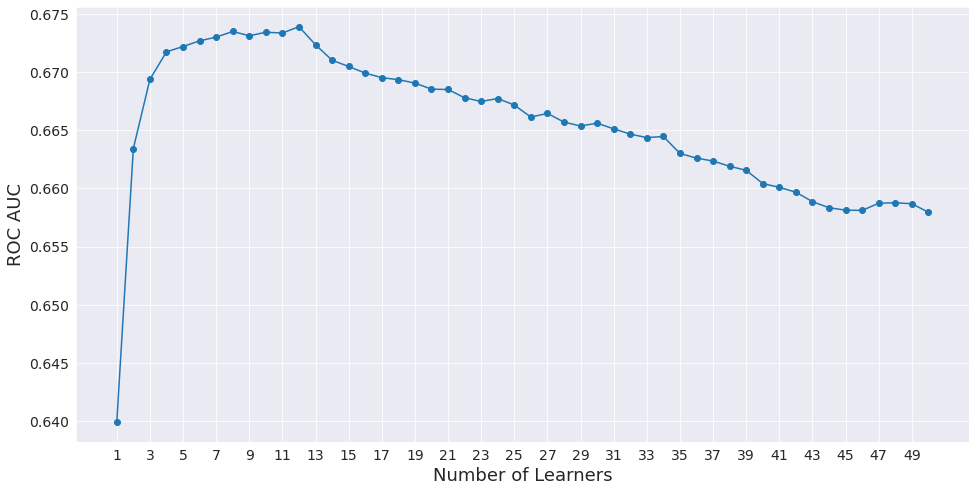

In [57]:
## choose the best value for n_estimators here
## according to your cross-validation results
print(num_learners[np.argmax(np.mean(ada_aucs, axis=0))],
      "is the number of estimators with highest mean CV ROC AUC.")

plt.figure(figsize=(16,8))

plt.plot(num_learners, np.mean(ada_aucs, axis=0), '-o')


plt.xlabel("Number of Learners", fontsize=18)
plt.ylabel("ROC AUC", fontsize=18)

plt.xticks(range(1,51,2), fontsize=14)
plt.yticks(fontsize=14)


#plt.ylim((.88,1))


plt.show()

Confusion metric for AdaBoostClassifier

In [58]:
Ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=35), n_estimators=12, learning_rate=1)

In [59]:
Ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=35),
                   learning_rate=1, n_estimators=12)

In [60]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [61]:
confusion_matrix(y_test, Ada.predict(X_test))

array([[22733,    65],
       [ 2159,    32]])

In [62]:
Tree = DecisionTreeClassifier(max_depth=17, random_state=332)

In [63]:
Tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=17, random_state=332)

In [64]:
confusion_matrix(y_test, Tree.predict(X_test))

array([[21963,   835],
       [ 2057,   134]])